In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras import metrics, layers
from keras.callbacks import Callback
import os

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

Import the dataset

In [4]:
features = ['mean_integ_profile', 
            'sd_integ_profile', 
            'excess_kurtosis_integ_profile', 
            'skewness_integ_profile', 
            'mean_DM-SNR_curve', 
            'sd_DM-SNR_curve', 
            'excess_kurtosis_DM-SNR_curve', 
            'skewness_DM-SNR_curve', 
            'label']
htru2_dataframe = pd.read_csv('HTRU2_data/HTRU_2.csv', names=features)

In [6]:
htru2_dataframe.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
htru2_dataframe.shape

(17898, 9)

In [8]:
htru2_dataframe.dtypes

mean_integ_profile               float64
sd_integ_profile                 float64
excess_kurtosis_integ_profile    float64
skewness_integ_profile           float64
mean_DM-SNR_curve                float64
sd_DM-SNR_curve                  float64
excess_kurtosis_DM-SNR_curve     float64
skewness_DM-SNR_curve            float64
label                              int64
dtype: object

In [9]:
htru2_dataframe.isnull().values.any()

False

Split dataframe into X and Y

In [10]:
htru2_dataframe.loc[:, 'mean_integ_profile':'skewness_DM-SNR_curve'].head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [11]:
htru2_dataframe.loc[:, 'label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [12]:
X = htru2_dataframe.loc[:, 'mean_integ_profile':'skewness_DM-SNR_curve']
Y = htru2_dataframe.loc[:, 'label']
print(X.shape)
print(Y.shape)

(17898, 8)
(17898,)


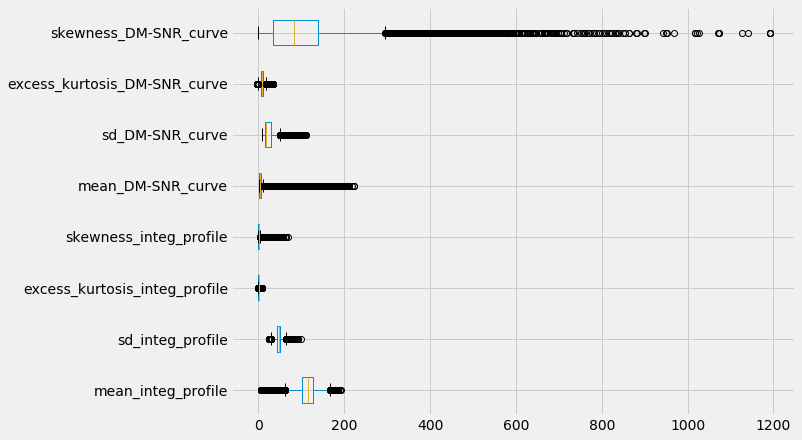

In [15]:
plt.style.use('fivethirtyeight')
X.boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13423, 8)
(4475, 8)
(13423,)
(4475,)


In [23]:
X_train.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve
7461,120.156250,52.624323,-0.051355,-0.448955,2.819398,17.198064,9.600430,111.969890
10110,108.742188,47.356402,0.380945,-0.215677,5.352007,28.465651,5.831819,34.882063
13001,97.914062,33.631511,0.436301,3.014447,0.571070,8.469054,24.211602,688.313733
5487,135.804688,48.613761,-0.198646,-0.017908,2.304348,17.159473,10.503444,127.255263
9551,104.914062,34.950641,0.483299,1.915524,0.975753,12.298758,14.434839,230.958270


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
min_max_scaler = MinMaxScaler(feature_range=(0,1), copy=True)
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [27]:
X_train[0:5, :]

array([[0.61938214, 0.37618228, 0.17517469, 0.01999068, 0.01200134,
        0.09602715, 0.33231736, 0.09550557],
       [0.55755396, 0.30498195, 0.22026633, 0.02346323, 0.02366385,
        0.20612431, 0.2314234 , 0.03088694],
       [0.4988997 , 0.11947861, 0.22604033, 0.07154638, 0.00164792,
        0.01073479, 0.72349037, 0.57862406],
       [0.70414727, 0.3219762 , 0.15981134, 0.02640718, 0.00962956,
        0.09565007, 0.356493  , 0.10831849],
       [0.5368176 , 0.13730774, 0.23094246, 0.05518797, 0.00351146,
        0.04815535, 0.46174504, 0.19524722]])

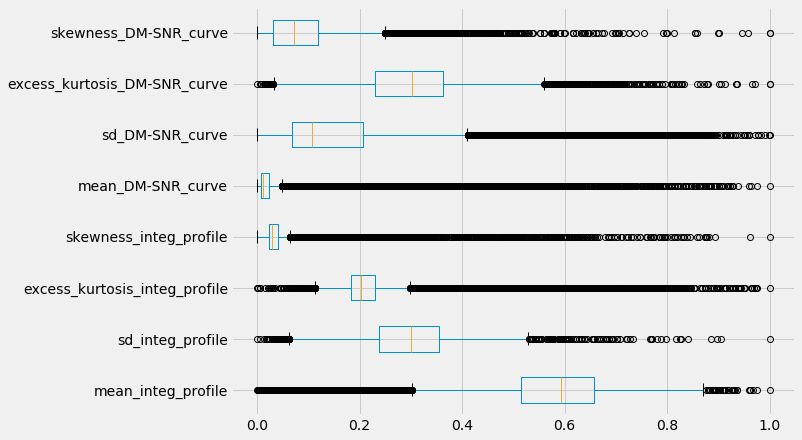

In [30]:
plt_df = pd.DataFrame(data=X_train, columns=['mean_integ_profile', 
                                             'sd_integ_profile', 
                                             'excess_kurtosis_integ_profile', 
                                             'skewness_integ_profile', 
                                             'mean_DM-SNR_curve', 
                                             'sd_DM-SNR_curve', 
                                             'excess_kurtosis_DM-SNR_curve', 
                                             'skewness_DM-SNR_curve'])
plt_df.boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

Dimensionality Reduction:

In [32]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)
pca_3.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
p3_x_train_transformed = pca_3.transform(X_train)

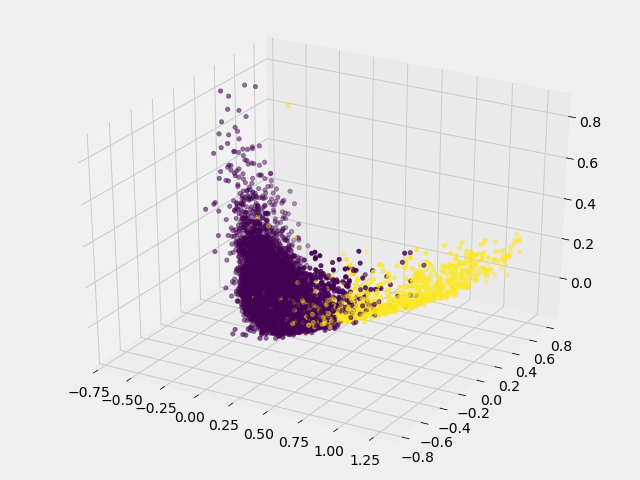

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(p3_x_train_transformed[:, 0]).flatten()
y_ax = np.array(p3_x_train_transformed[:, 1]).flatten()
z_ax = np.array(p3_x_train_transformed[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = Y_train, marker = 'o')
plt.show()

In [36]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print('\n val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return

In [37]:
metrics1 = Metrics()
